Se obtuvieron los datos de la altitud de las distintas estaciones meteorológicas de Tenerife (unas 62 estaciones) (https://datos.gob.es/es/catalogo/l03380011-estaciones-meteorologicas-de-tenerife), y de datos climáticos 10 minutales entre el 1 de enero de 2024 y el 28 de abril de 2024 para 49 de esas estaciones(https://datos.tenerife.es/es/)

In [7]:
using Pkg
Pkg.add("XLSX")
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("DelimitedFiles")

   Resolving package versions...
  No Changes to `C:\Users\Miguel\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Miguel\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Miguel\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Miguel\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Miguel\.julia\environments\v1.9\Project.toml`
  No Changes to `C:\Users\Miguel\.julia\environments\v1.9\Manifest.toml`
   Resolving package versions...
    Updating `C:\Users\Miguel\.julia\environments\v1.9\Project.toml`
  [8bb1440f] + DelimitedFiles v1.9.1
  No Changes to `C:\Users\Miguel\.julia\environments\v1.9\Manifest.toml`


La columna 'estacion_id' es la columna número 1
La columna 'altitud' es la columna número 13


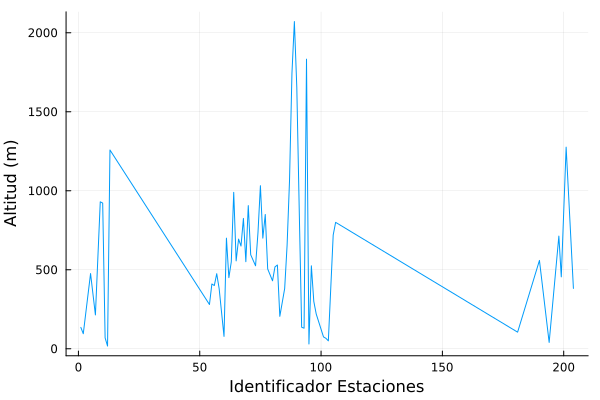

In [2]:
using CSV
using DataFrames
using Plots

name1 = "C:\\Users\\Miguel\\Desktop\\TFM\\Datos_Reales//Estaciones.txt"
data = CSV.read(name1, DataFrame, delim = ',')
# Ahora, 'data' es un DataFrame que contiene los datos del archivo CSV (txt)
#data[!,n] Se corresponde a la columna n del dataframe

# Buscar la columna 'estacion_id'
estacion_id_column = findfirst(x -> x == "estacion_id", names(data))
println("La columna 'estacion_id' es la columna número $estacion_id_column")

# Buscar la columna 'altitud'
altitud_column = findfirst(x -> x == "altitud", names(data))
println("La columna 'altitud' es la columna número $altitud_column")
plot!(data[!,estacion_id_column],data[!,altitud_column], xlabel="Identificador Estaciones", ylabel= "Altitud (m)" , legend=false)

Podemos ver que hay altitudes de 0 a 2000 m

In [3]:
using XLSX
using CSV
using DataFrames
using Statistics

name2="C:\\Users\\Miguel\\Desktop\\TFM\\Datos_Reales\\Datos_Tete_Excel.xlsx"
# Carga el archivo Excel
archivo_excel = XLSX.readxlsx(name2)

# Obtiene el nombre de la hoja
sheet_name = XLSX.sheetnames(archivo_excel)[1]

# Lee los datos de la hoja
data2 = DataFrame(XLSX.readtable(name2, sheet_name))

# Inicializa una lista vacía para almacenar los DataFrames
df = []

# Bucle para todas las columnas de data2
for i in 1:size(data2, 2)
    # Elimina los valores `missing` del vector
    data_clean = filter(!ismissing, data2[:, i])

    # Divide cada fila en valores separados por comas
    data_split = [split(row, ',') for row in data_clean]

    # Convierte la lista de listas en un DataFrame y lo añade a la lista
    push!(df, permutedims(DataFrame(data_split, :auto)))
end
#Accede a cada columna como df[i]

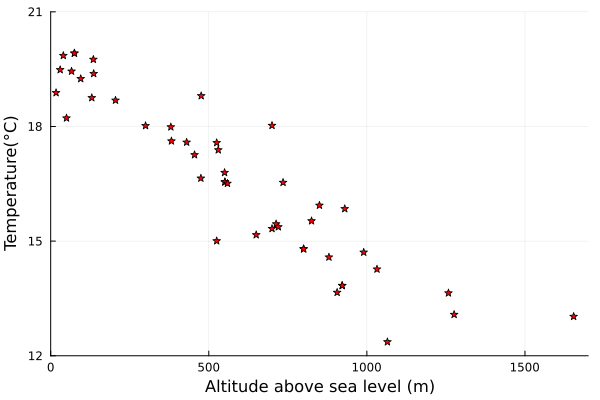

In [7]:
using Plots
using DelimitedFiles

#Guardamos el Identificador de cada estación meteorológica
ID=[]
# Inicializa una lista vacía para almacenar los DataFrames de temperatura
df_temp = []

# Bucle para todos los DataFrames en df
for j in 1:length(df)
    push!(ID,  parse(Int64,df[j][1, 1]) ) #Vale cualquier fila
    df_temp_j=[]
    # Bucle para todas las filas del DataFrame df[j]
    for i in 1:size(df[j], 1)
        # Comprueba si el valor en la columna 5 es "temperatura" y si el valor en la columna 7 no está vacío
        if df[j][i, 5] == "Temperatura" && !ismissing(df[j][i, 7]) && df[j][i, 7] != ""
            # Si es así, añade la fila al DataFrame df_temp_j
            push!(df_temp_j, parse(Float64, df[j][i, 7])) #parse convierte a float
        end
    end

    # Añade el DataFrame df_temp_j a la lista df_temp
    push!(df_temp, df_temp_j)
end

temp_medias = [mean(vector) for vector in df_temp]
datos_para_txt = []
# Inicializa dos listas vacías para almacenar las altitudes y las temperaturas medias correspondientes
altitudes_plot = []
temp_medias_plot = []
# Bucle para todos los IDs en la lista ID
for i in 1:length(ID)
    # Busca el ID en la primera columna de data
    j = findfirst(x -> x == ID[i], data[!, 1])

    # Si el ID se encuentra en data
    if !isnothing(j)
        # Añade la altitud y la temperatura media correspondiente a las listas
        push!(altitudes_plot, data[j, 13])
        push!(temp_medias_plot, temp_medias[i])
        # Añade el ID, el nombre de la estación, la altitud y la temperatura media a la matriz
        push!(datos_para_txt, [ID[i], data[j, 2], data[j, 13], temp_medias[i]])
    end
end

# Escribe la matriz en un archivo txt delimitado por espacios
writedlm("C:\\Users\\Miguel\\Desktop\\TFM\\Datos_TemperaturaAltitud", datos_para_txt, ' ')

# Ahora puedes representar las temperaturas medias en función de las altitudes
plot1=plot(altitudes_plot, temp_medias_plot, seriestype = :scatter, xlabel = "Altitude above sea level (m)", ylabel = "Temperature(°C)", xlims=(0,1700), ylims=(12,21), color=:red, shape=:star, title = "",label=false)
savefig("C:\\Users\\Miguel\\Desktop\\TFM\\GraficaRealTenerife_TemperaturaMediaAltitud")
plot1

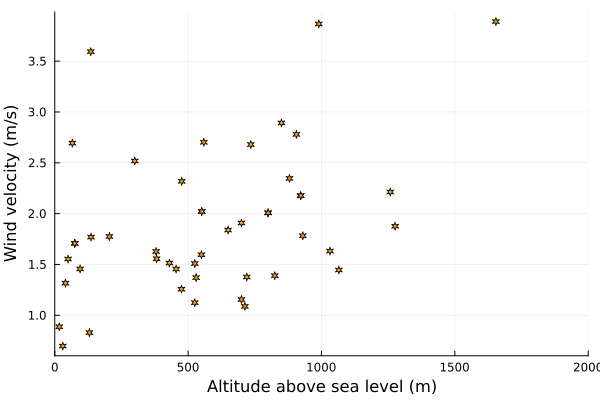

In [9]:
using Plots
using DelimitedFiles

#Guardamos el Identificador de cada estación meteorológica
ID_2=[]
# Inicializa una lista vacía para almacenar los DataFrames de temperatura
df_wind = []

# Bucle para todos los DataFrames en df
for j in 1:length(df)
    push!(ID_2,  parse(Int64,df[j][1, 1]) ) #Vale cualquier fila
    df_wind_j=[]
    # Bucle para todas las filas del DataFrame df[j]
    for i in 1:size(df[j], 1)
        # Comprueba si el valor en la columna 5 es "temperatura" y si el valor en la columna 7 no está vacío
        if df[j][i, 5] == "Velocidad del viento" && !ismissing(df[j][i, 7]) && df[j][i, 7] != ""
            # Si es así, añade la fila al DataFrame df_temp_j
            push!(df_wind_j, parse(Float64, df[j][i, 7])) #parse convierte a float
        end
    end

    # Añade el DataFrame df_temp_j a la lista df_temp
    push!(df_wind, df_wind_j)
end
wind_media = [mean(vector) for vector in df_wind]

datos_para_txt_2 = []
# Inicializa dos listas vacías para almacenar las altitudes y las temperaturas medias correspondientes
altitudes_plot = []
wind_media_plot = []
# Bucle para todos los IDs en la lista ID
for i in 1:length(ID_2)
    # Busca el ID en la primera columna de data
    j = findfirst(x -> x == ID_2[i], data[!, 1])

    # Si el ID se encuentra en data
    if !isnothing(j)
        # Añade la altitud y la temperatura media correspondiente a las listas
        push!(altitudes_plot, data[j, 13])
        push!(wind_media_plot, wind_media[i])
        # Añade el ID, el nombre de la estación, la altitud y la temperatura media a la matriz
        push!(datos_para_txt, [ID_2[i], data[j, 2], data[j, 13], wind_media[i]])
    end
end

# Escribe la matriz en un archivo txt delimitado por espacios
writedlm("C:\\Users\\Miguel\\Desktop\\TFM\\Datos_VelocidadAltitud", datos_para_txt, ' ')

# Ahora puedes representar las temperaturas medias en función de las altitudes
plot2=plot(altitudes_plot, wind_media_plot, seriestype = :scatter, xlabel = "Altitude above sea level (m)", ylabel = "Wind velocity (m/s)", xlims=(0,2000), color=:orange, shape=:star6, title = "",label=false)
savefig("C:\\Users\\Miguel\\Desktop\\TFM\\GraficaRealTenerife_VelocidadMediaVientoAltitud")
plot2

Podemos observar que la altitud del terreno sí afecta a la temperatura, pero no a la velocidad del viento, que depende meramente de la columna de aire.

Regresión lineal sobre la gráfica de temperatura.

In [9]:
# Cargamos el archivo de texto
archivo = "C:\\Users\\Miguel\\Desktop\\TFM\\Datos_Reales\\Datos_TemperaturaAltitud"

# Inicializamos los vectores para almacenar los valores
h = Float64[]
T = Float64[]

# Leemos el archivo línea por línea
for linea in eachline(archivo)
    # Dividimos la línea en columnas usando espacios como separadores
    partes = split(linea)
    
    # Convertimos las dos últimas columnas a números de punto flotante
    push!(h, parse(Float64, partes[end-1]))
    push!(T, parse(Float64, partes[end]))
end


In [19]:
# Importamos las librerías necesarias
using CSV
using Plots
using Statistics
using GLM

# Creamos un DataFrame con los datos
data = DataFrame(Temperatura = T, Altitud = h)

# Realizamos la regresión lineal
lm_model = lm(@formula(Temperatura ~ Altitud), data)

# Obtenemos los coeficientes de la regresión
coeficientes = coef(lm_model)

# Creamos un rango de altitudes para la gráfica
altitudes_range = minimum(h):0.1:maximum(h)

# Calculamos los valores predichos de temperatura
temperaturas_predichas = coeficientes[1] .+ coeficientes[2] .* altitudes_range

p=plot(h, T, seriestype = :scatter, xlabel = "Altitude above sea level (m)", ylabel = "Temperature(°C)", xlims=(0,1700), ylims=(12,21), color=:red, shape=:star, title = "",label="Data")
plot!(altitudes_range, temperaturas_predichas, label = "Regression line", color = :black, linewidth = 1.5)


# Imprimimos los coeficientes
println("Coeficiente de intersección (a): ", coeficientes[1])
println("Coeficiente de pendiente (b): ", coeficientes[2])
println("Ecuación de la recta de regresión: T = $(coeficientes[1]) + $(coeficientes[2]) * Altitud")
# Calculamos el coeficiente de correlación (R)
correlation_coefficient = cor(h, T)

# Imprimimos el resultado
println("Coeficiente de correlación (R): ", correlation_coefficient)
println("Coeficiente de determinación (R^2): ", correlation_coefficient^2)
savefig(p,"RegresionlinealTvsAltitude.png")


Coeficiente de intersección (a): 19.357447363396325
Coeficiente de pendiente (b): -0.004650764395191337
Ecuación de la recta de regresión: T = 19.357447363396325 + -0.004650764395191337 * Altitud
Coeficiente de correlación (R): -0.9118608330754255
Coeficiente de determinación (R^2): 0.831490178897009


"C:\\Users\\Miguel\\Desktop\\TFM\\Codigos Julia\\RegresionlinealTvsAltitude.png"